In [1]:
#TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

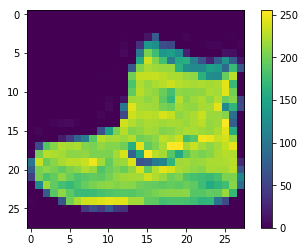

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

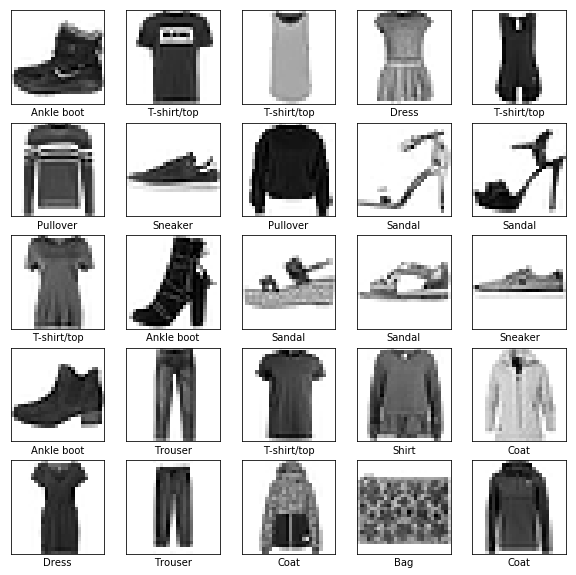

In [12]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0781 - accuracy: 0.6655
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6402 - accuracy: 0.7683
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5638 - accuracy: 0.7975
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5208 - accuracy: 0.8154
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8267
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4719 - accuracy: 0.8335
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.8399
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8430
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4338 - accuracy: 0.8475
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.425

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 95.9213 - accuracy: 0.6767

Test accuracy: 0.6766999959945679


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

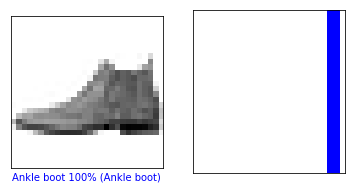

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

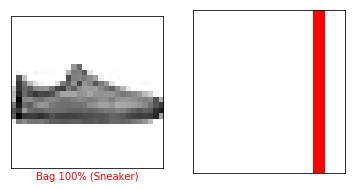

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

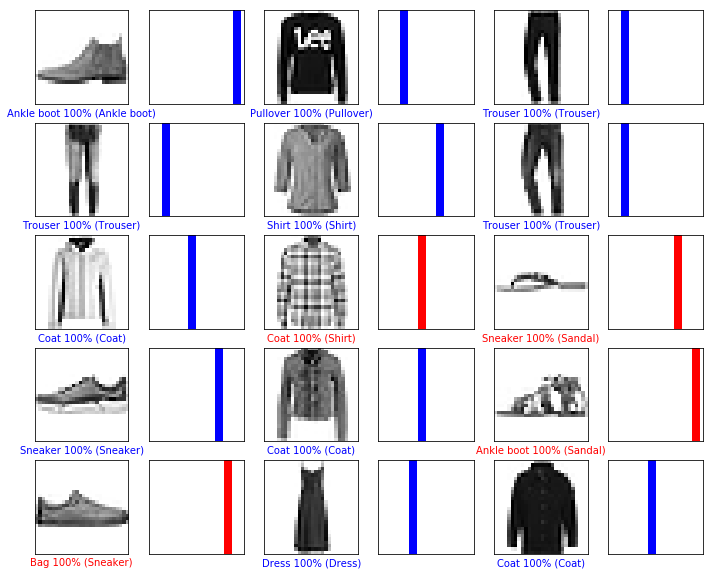

In [25]:
# Plota o primeiro X test images e as labels preditas, e as labels verdadeiras
# Colore as predições corretas de azul e as incorretas de vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

In [26]:
img = test_images[0]
print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)
print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


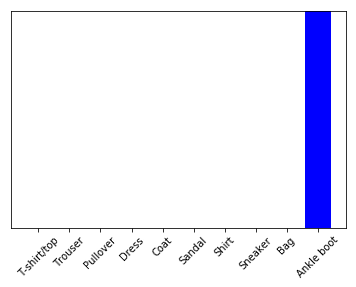

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9